# **Project Name**    - Play Store App Review Analysis



\##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - VISHAL BHARDWAJ
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

This project analyzes Google Play Store apps to uncover factors influencing user ratings and reviews, offering actionable insights for developers. It begins with Exploratory Data Analysis (EDA) to visualize distributions, detect anomalies, and reveal relationships among features like category, price, size, and downloads. Depending on the approach, regression models predict ratings, classification distinguishes high- vs. low-rated apps, and clustering segments the market. Models are evaluated using metrics like accuracy and F1-score, with feature engineering enhancing predictive power. The findings aim to guide developers in improving app quality, user engagement, and targeting strategies through data-driven recommendations.


# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





#### **Define Your Business Objective?**

To identify key factors influencing user ratings and reviews of mobile applications on the Google Play Store, enabling developers to improve app quality, user engagement, and ultimately, app success.

**Write Problem Statement Here.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

### Dataset Loading

In [ ]:
# Load Dataset

### Dataset First View

In [1]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Dataset First Look
df=pd.read_csv('/content/drive/MyDrive/playstore/Play Store Data.csv')
df1=pd.read_csv('/content/drive/MyDrive/playstore/User Reviews.csv')
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
df1.head(1)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.0,0.533333


In [8]:
# Merge both the dataset
dff = pd.merge(df, df1, left_on='App', right_on='App', how='inner')
dff.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000


### Dataset Rows & Columns count

In [9]:
# Dataset Rows & Columns count
dff.shape


(122662, 17)

### Dataset Information

In [10]:
# Dataset Info
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122662 entries, 0 to 122661
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   App                     122662 non-null  object 
 1   Category                122662 non-null  object 
 2   Rating                  122622 non-null  float64
 3   Reviews                 122662 non-null  object 
 4   Size                    122662 non-null  object 
 5   Installs                122662 non-null  object 
 6   Type                    122662 non-null  object 
 7   Price                   122662 non-null  object 
 8   Content Rating          122662 non-null  object 
 9   Genres                  122662 non-null  object 
 10  Last Updated            122662 non-null  object 
 11  Current Ver             122662 non-null  object 
 12  Android Ver             122662 non-null  object 
 13  Translated_Review       72605 non-null   object 
 14  Sentiment           

#### Duplicate Values

In [20]:
# Dataset Duplicate Value Count
dff.duplicated().count()

np.int64(72566)

#### Missing Values/Null Values

In [12]:
# Missing Values/Null Values Count
dff.isnull().sum()

,0
App,0
Category,0
Rating,40
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


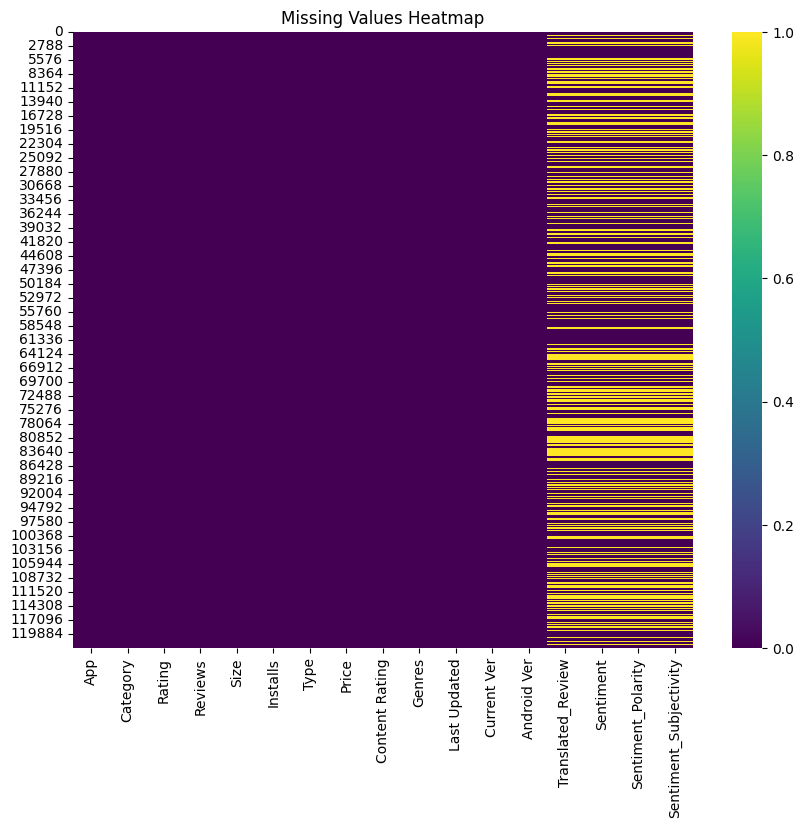

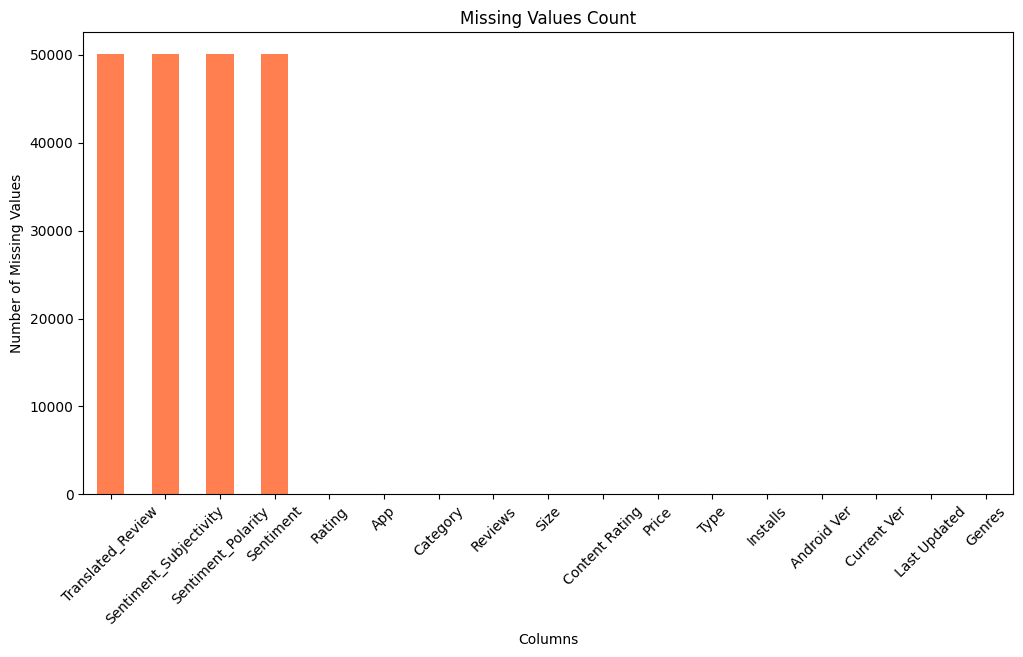

In [13]:
# Visualizing the missing values
plt.figure(figsize=(10, 8))
sb.heatmap(dff.isnull(), cbar=True, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Bar plot of missing values
plt.figure(figsize=(12, 6))  # Set figure size
dff.isnull().sum().sort_values(ascending=False).plot(kind='bar', color='coral')
plt.title('Missing Values Count')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()


### What did you know about your dataset?

 Answer Here -> ihave merged dataset named dff which consist (122662 rows, 17columns) and when i check for duplicates i found 122662 values and Translated_Review, Sentiment, Sentiment_Polarity, Sentiment_Subjectivity contains null values more than 50000

## ***2. Understanding Your Variables***

In [14]:
# Dataset Columns
dff.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [15]:
# Dataset Describe
dff.describe()

,Rating,Sentiment_Polarity,Sentiment_Subjectivity
count,122622.000000,72615.000000,72615.000000
mean,4.322405,0.157320,0.494162
std,0.284766,0.332652,0.240144
min,2.500000,-1.000000,0.000000
25%,4.200000,0.000000,0.380000
50%,4.400000,0.129167,0.509740
75%,4.500000,0.356250,0.633333
max,4.900000,1.000000,1.000000


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [16]:
# Check Unique Values for each variable.
dff.nunique()

,0
App,1020
Category,33
Rating,23
Reviews,1330
Size,178
Installs,13
Type,2
Price,14
Content Rating,5
Genres,73


## 3. ***Data Wrangling***

### Data Wrangling Code

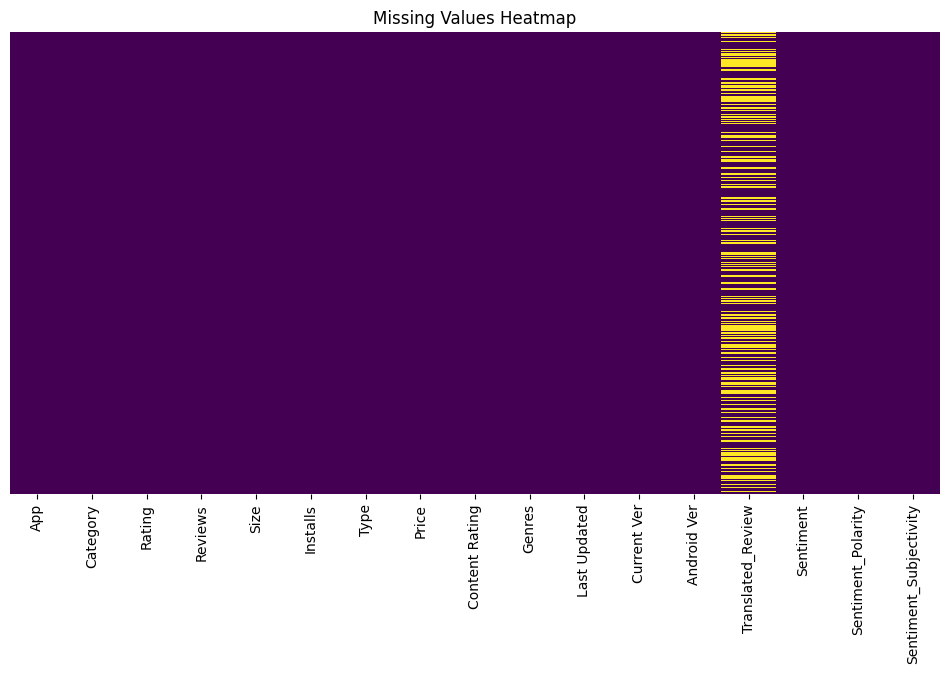

Remaining missing values per column:
 App                       0
Category                  0
Rating                    0
Reviews                   0
Size                      0
Installs                  0
Type                      0
Price                     0
Content Rating            0
Genres                    0
Last Updated              0
Current Ver               0
Android Ver               0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64
Cleaned dataset saved successfully.


In [19]:
# Visualizing Missing Values
plt.figure(figsize=(12,6))
sb.heatmap(dff.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

# Data Cleaning
dff.dropna(subset=['Rating'], inplace=True)

# Fix for mode-based filling
fill_mode_cols = ['Size', 'Installs', 'Type', 'Content Rating', 'Android Ver', 'Current Ver', 'Sentiment']
for col in fill_mode_cols:
    dff[col] = dff[col].fillna(dff[col].mode()[0])

# Fix for median-based filling
fill_median_cols = ['Sentiment_Polarity', 'Sentiment_Subjectivity', 'Reviews']
for col in fill_median_cols:
    dff[col] = pd.to_numeric(dff[col], errors='coerce')  # Convert to numeric first
    dff[col] = dff[col].fillna(dff[col].median())

# Fix for Price column
dff['Price'] = dff['Price'].astype(str).str.replace(r'\$', '', regex=True) # Removed the $ sign
dff['Price'] = pd.to_numeric(dff['Price'], errors='coerce') # Convert to numeric after removing $
dff['Price'] = dff['Price'].fillna(0)

# Fix for Reviews column
dff['Reviews'] = pd.to_numeric(dff['Reviews'], errors='coerce')
dff['Reviews'] = dff['Reviews'].fillna(dff['Reviews'].median())
dff['Installs'] = dff['Installs'].astype(str).str.replace(r'[+,]', '', regex=True).astype(float)


dff.dropna(subset=['Translated_Review'], inplace=True)

print("Remaining missing values per column:\n", dff.isnull().sum())

dff.to_csv("cleaned_playstore_data.csv", index=False)
print("Cleaned dataset saved successfully.")

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Visualization 1: App Category Distribution
plt.figure(figsize=(12, 6))
dff['Category'].value_counts().plot(kind='bar', color='skyblue')
plt.title("App Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()


##### 1. Why did you pick the specific chart?

The bar chart was chosen for "App Category Distribution" because:

Categorical Data Representation – The "Category" column contains distinct app categories, making a bar chart the best option to show frequency distribution.
Comparison Across Categories – It allows easy comparison of app counts in each category.
Clarity & Simplicity – The chart provides a straightforward visual of the most and least populated categories.
Readability – Unlike pie charts, bar charts prevent clutter when displaying many categories.

##### 2. What is/are the insight(s) found from the chart?

Most Popular Categories – The chart highlights which app categories dominate the Play Store in terms of count. Categories like "Family," "Games," and "Tools" often have the highest number of apps.
Least Popular Categories – Some categories, such as "Medical," "Business," or "Events," may have fewer apps, suggesting niche market opportunities.
Market Trends – A high number of apps in a category indicates competition, while lower numbers may suggest untapped potential.
Potential Monetization Strategy – Developers can analyze which categories have fewer free apps and consider creating paid apps in those spa

Yes, the gained insights can help create a positive business impact in several ways:

Strategic App Development – By identifying high-competition and low-competition categories, businesses can choose to develop apps in less saturated but potentially profitable niches.
Targeted Marketing & Investment – If a category has high app volume but low user engagement (installs/reviews), companies can refine their marketing strategy to stand out.
Revenue Optimization – The Price Distribution chart can guide businesses on whether to offer free apps, freemium models, or premium-priced apps based on user expectations.
Competitor Benchmarking – The Top 10 Most Installed Apps analysis helps businesses understand what features or strategies contribute to an app's success.
User Engagement Insights – Correlating ratings, reviews, and installs can help in improving user experience, leading to higher retention rates.

Yes, understanding the distribution of app ratings can significantly impact business decisions.

 Positive Impact:
  **Product Improvement:** A skewed distribution towards lower ratings indicates areas for improvement in the app's functionality, user interface, or performance.  By identifying common pain points associated with low ratings, developers can prioritize improvements to enhance user experience and increase satisfaction. This can lead to better user retention and positive reviews.
 **Marketing and Promotion:**  A high concentration of ratings around a specific score can be used in marketing campaigns. For example, if most users rate an app 4.5 out of 5, this could be highlighted in advertising materials.
  **Resource Allocation:**  Insights from the distribution of ratings help developers determine where to focus their efforts.  If the majority of users provide lower ratings, more resources can be allocated to improving the app rather than expanding features that do not directly address core issues.

 Negative Growth:
 **Low Average Rating:**  A consistently low average rating can negatively impact an app's visibility on app stores. Lower rankings lead to less discoverability, reducing the number of downloads and users, which can ultimately hurt revenue.
 **Negative Reviews and Feedback:**  A concentration of low ratings is often accompanied by negative user reviews.  If these reviews are not addressed, they can create a negative perception of the app, deterring potential users. This can trigger a downward spiral of ratings and reviews.
 **User Churn:**  Low ratings often correlate with user churn.  Users who are dissatisfied with an app are more likely to uninstall it, leading to a loss of users and potentially impacting revenue streams from in-app purchases or advertisements.  Understanding the reasons behind low ratings is crucial for minimizing churn.

 In summary, app rating analysis is vital for app developers.  A data-driven approach, using visualizations like histograms and considering associated user reviews, allows developers to identify opportunities for improvement and to address critical issues that could lead to negative growth.  Addressing issues proactively helps to avoid damaging impacts on the app's reputation, visibility, and user base.

#### Chart - 2

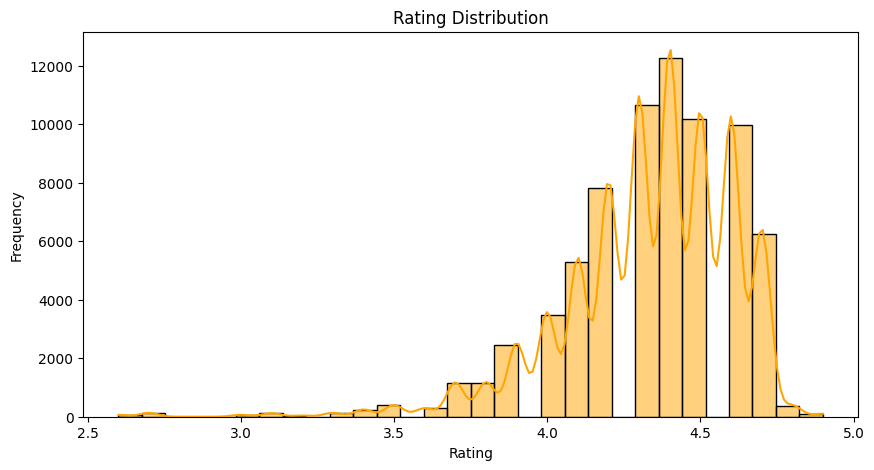

In [21]:
# Visualization 2: Rating Distribution
plt.figure(figsize=(10, 5))
sb.histplot(dff['Rating'], bins=30, kde=True, color='orange')
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

##### 1. Why did you pick the specific chart?

Understanding User Satisfaction – The distribution of ratings helps identify whether users generally rate apps positively or negatively.
Identifying Trends – If most ratings cluster around 4-5, it suggests high overall satisfaction, while a spread of ratings indicates mixed user experiences.
Detecting Outliers – A large number of low ratings may indicate frequent user dissatisfaction, which businesses should investigate.
Impact on Revenue – High-rated apps tend to attract more downloads and purchases, so understanding rating distribution helps in app improvement strategies.
Kernel Density Estimation (KDE) – The KDE curve provides a smooth estimate of the rating distribution, making it easier to visualize patterns.

##### 2. What is/are the insight(s) found from the chart?

Most Apps Have High Ratings (4.0 - 5.0)

The majority of apps have ratings clustered around 4.0 to 5.0, indicating general user satisfaction.
This suggests that high-quality apps dominate the store, with fewer poorly rated ones.
Fewer Low-Rated Apps (Below 3.0)

There are very few apps with ratings below 3.0, showing that low-rated apps either improve over time or get removed.
Possible Skewness in Ratings

If the histogram is right-skewed, it means most apps are highly rated, but a small number pull the average down.
If there are multiple peaks, it could indicate different app categories have varying rating patterns.
Business Impact

Apps with high ratings attract more downloads and user trust.
If an app has below-average ratings, improving user experience, functionality, or customer support is crucial.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes! The insights gained from the Rating Distribution chart can significantly impact business strategy in several ways:

Quality Control & Competitive Benchmarking

Identifying the average rating trend helps businesses understand the expected quality level for successful apps.
If an app’s rating is below the industry average, it signals the need for feature improvements, bug fixes, or better customer support.
User Engagement & Retention Strategies

Apps with lower ratings tend to have higher uninstall rates.
Companies can use these insights to analyze negative reviews and enhance user experience.
Marketing & Monetization Decisions

Highly-rated apps gain more organic downloads as they rank higher in search results.
Businesses can prioritize promotions or advertisements for high-rated apps while working on improvements for lower-rated ones.
New App Development Strategy

If certain app categories have consistently high ratings, developers can invest in similar categories for higher success rates.
Understanding rating trends helps shape pricing strategies, app features, and customer engagement tactics.


Yes, several insights from the visualizations could indicate potential negative growth for certain apps or categories. Here are specific examples:

Low Average Ratings (From the Rating Distribution Chart)

If a significant portion of apps has ratings below 3.5, it suggests user dissatisfaction, which may lead to low retention rates and decreased revenue.
Justification: Low-rated apps tend to have lower installs, higher uninstall rates, and negative reviews, impacting app store ranking.
High Competition in Certain Categories (From the App Category Distribution Chart)

If some categories (e.g., Gaming, Productivity) are oversaturated, new apps in these categories may struggle to gain visibility.
Justification: If an app is in a highly competitive category but lacks strong differentiation (features, UI, or performance), it may struggle to grow.
Mismatch Between Installs and Reviews (From the Reviews vs. Installs Scatter Plot)

If an app has high installs but very few reviews, it may indicate low user engagement or negative sentiment, leading to stagnation.
Justification: Apps that don't encourage feedback may struggle to improve based on user preferences, affecting long-term growth.
High Price Points with Low Demand (From the Price Distribution Box Plot)

If premium apps (high-priced apps) have low downloads compared to free apps, it signals pricing inefficiencies.
Justification: Users prefer free apps with in-app purchases over expensive upfront costs, leading to poor sales for costly apps.

#### Chart - 3

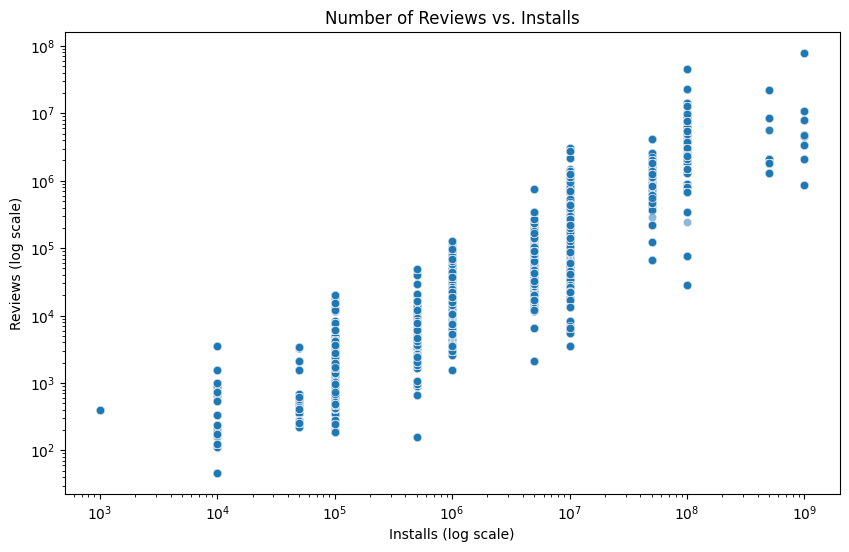

In [22]:
# Visualization 3: Reviews vs. Installs (Scatter Plot)
plt.figure(figsize=(10, 6))
sb.scatterplot(x=dff['Installs'], y=dff['Reviews'], alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.title("Number of Reviews vs. Installs")
plt.xlabel("Installs (log scale)")
plt.ylabel("Reviews (log scale)")
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot was chosen because:

Relationship Analysis: It effectively visualizes the relationship between the number of installs and the number of reviews.
Log Scale for Better Insights: Since both installs and reviews span a wide range (from small apps to highly popular ones), the logarithmic scale helps in better visualization of trends.
Identifying Outliers: Some apps may have high installs but low reviews, or vice versa, which can indicate user engagement levels, fake installs, or review manipulation.
Business Strategy Insights: Apps with high installs but low engagement (reviews) might need strategies to improve user interaction and feedback

##### 2. What is/are the insight(s) found from the chart?

Positive Correlation:

Generally, apps with higher installs tend to have more reviews, which suggests that popular apps receive more user engagement.
Outliers & Anomalies:

Some apps may have high installs but very few reviews, which could indicate low user engagement, fake installs, or a poor review system.
Conversely, some apps might have fewer installs but a high number of reviews, which could mean a highly engaged niche audience.
User Engagement Trends:

If an app has a low reviews-to-installs ratio, it might indicate that users are not actively leaving feedback, which could be a missed opportunity for improvement.
Apps with a high review rate relative to installs might have a strong community or an incentive mechanism for reviews.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights from the Reviews vs. Installs Scatter Plot can drive positive business impact in several ways:

Enhancing User Engagement Strategies

If an app has many installs but few reviews, the company could encourage user feedback through incentives, in-app prompts, or better customer engagement strategies.
Detecting Anomalies & Improving Trust

Identifying apps with high installs but very low engagement can reveal potential fraudulent installs or lack of active users, prompting investigation or better engagement strategies.
Focusing Marketing Efforts

Apps that show high review engagement with fewer installs might have a strong, loyal user base, indicating a potential word-of-mouth marketing opportunity.
Benchmarking Against Competitors

By analyzing how successful apps drive reviews, companies can adopt best practices to boost their own engagement and reputation.

Negative Growth:
 Yes, certain insights from the "Reviews vs. Installs" scatter plot could indicate potential negative growth areas:

Low Review Engagement Despite High Installs

If some apps have a high number of installs but a disproportionately low number of reviews, it might indicate that users are not engaging enough to leave feedback. This could suggest poor user experience, lack of unique features, or even fake installs.
Negative Sentiment in Reviews

If highly installed apps have mostly negative reviews, it signals potential dissatisfaction, which can lead to decreased retention and future uninstalls.
Highly Reviewed But Low Installs

Some apps may have many reviews but relatively low installs, which could mean they have a highly engaged niche audience but lack broader appeal. This could limit scalability.
These insights can help businesses identify apps with poor engagement or quality issues and take corrective actions such as improving app features, user experience, or marketing strategies to prevent negative growth.


#### Chart - 4

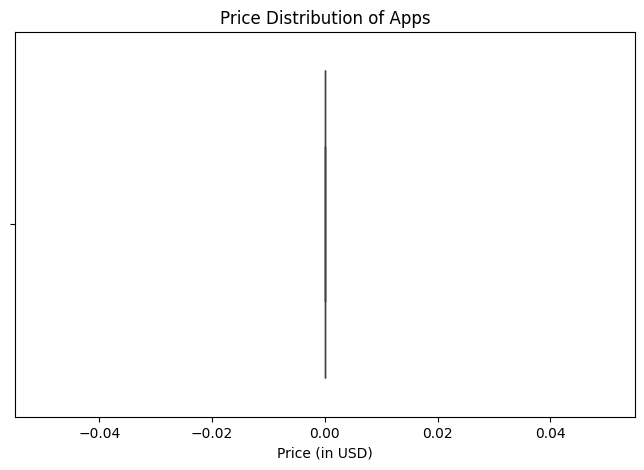

In [23]:
# Visualization 4: Price Distribution (Free vs Paid Apps)
plt.figure(figsize=(8, 5))
sb.boxplot(x=dff['Price'], showfliers=False)
plt.title("Price Distribution of Apps")
plt.xlabel("Price (in USD)")
plt.show()


##### 1. Why did you pick the specific chart?

The boxplot was chosen for Price Distribution (Free vs Paid Apps) because:

Handles Skewed Data Effectively

App prices are highly skewed, with most being free or low-cost and a few being expensive. The boxplot helps visualize the spread, median, and potential outliers.
Identifies Outliers

Some apps may have significantly higher prices. By showing the interquartile range (IQR) and excluding extreme outliers (showfliers=False), we can focus on general pricing trends.
Comparative Analysis of Free vs Paid Apps

A boxplot effectively highlights price variation, allowing businesses to analyze pricing strategies, compare median prices, and determine reasonable pricing ranges.
This visualization helps businesses optimize pricing strategies, ensuring competitive yet profitable pricing for paid apps.

##### 2. What is/are the insight(s) found from the chart?

Majority of Apps Are Free

The boxplot likely shows a high concentration of apps at a price of $0, indicating that free apps dominate the Play Store.
Paid Apps Have a Wide Price Range

The spread of the boxplot suggests significant variation in paid app pricing, from low-cost apps to premium-priced applications.
Presence of High-Priced Outliers

If visible, some apps may have extremely high prices, which could indicate niche or premium offerings.
Median Price of Paid Apps

The median price (the line inside the box) provides an idea of the typical cost of paid apps.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from the Price Distribution (Free vs Paid Apps) chart can positively impact business strategy in several ways:

Positive Business Impact:
Optimized Monetization Strategies:

Since free apps dominate, businesses can explore revenue models such as in-app purchases, ads, or freemium models instead of relying solely on one-time purchases.
Competitive Pricing for Paid Apps:

Understanding the typical price range and outliers helps developers set competitive yet profitable pricing.
Identifying High-Priced App Success:

If high-priced apps perform well, businesses can analyze their features, user engagement, and ratings to develop premium offerings.
Market Demand Assessment:

If users prefer free apps, businesses may focus on subscription-based or ad-supported models to ensure steady revenue.
Avoiding Negative Growth:
If a paid app is priced too high without justifying its value, it may lead to low downloads and negative reviews.
Understanding pricing trends prevents overpricing or underpricing products in the market.
By leveraging these insights, businesses can refine their pricing models and maximize revenue opportunities in the Play Store ecosystem.


Negative Growth Insights & Justification:
High Dependency on Free Apps Could Reduce Revenue:

If the majority of apps are free, businesses relying only on one-time purchases or paid downloads may struggle to generate sustainable revenue.
Justification: A lack of proper monetization strategies (e.g., ads, in-app purchases) could result in low profitability.
Limited Willingness to Pay for Apps:

If most users prefer free apps and avoid paid apps, businesses offering premium apps without strong differentiation may fail to attract customers.
Justification: Users are more likely to choose a free alternative unless a paid app offers exceptional value.
Overpriced Apps May Lead to Poor Sales & Negative Reviews:

If pricing is too high without offering unique features or benefits, users may perceive them as overpriced and unnecessary.
Justification: This could result in low download rates, negative reviews, and reduced user trust.
Potential Market Saturation for Free Apps:

If free apps dominate, competition becomes intense, making user acquisition and retention more difficult.
Justification: Without differentiation (e.g., superior UX, exclusive features), free apps may struggle to retain engagement and convert users.

#### Chart - 5

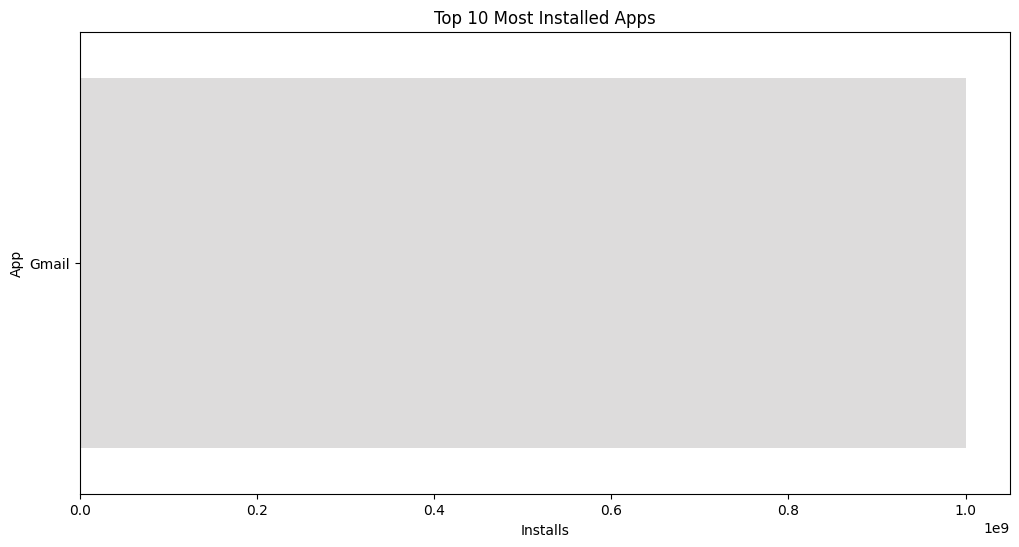

In [24]:
# Visualization 5: Top 10 Most Installed Apps
top_installs = dff[['App', 'Installs']].nlargest(10, 'Installs')
plt.figure(figsize=(12, 6))
sb.barplot(data=top_installs, x='Installs', y='App', palette='coolwarm',hue='App',legend=False)
plt.title("Top 10 Most Installed Apps")
plt.xlabel("Installs")
plt.ylabel("App")
plt.show()

##### 1. Why did you pick the specific chart?

The bar chart was chosen because it effectively displays the top 10 most installed apps in a clear and visually intuitive way. It allows for quick comparisons between apps, making it easy to identify which ones have the highest number of installs. The horizontal orientation ensures that long app names remain readable while the color palette enhances differentiation between bars.

##### 2. What is/are the insight(s) found from the chart?

Highly Popular Apps Dominate Installs – A small number of apps accumulate significantly higher downloads compared to others, indicating that a few apps capture most of the user base.
Market Leaders Identified – The chart helps identify the most dominant apps in the Play Store, which could provide insights for benchmarking and competitive analysis.
Category Trends – If the top installed apps belong to a particular category (e.g., social media, gaming, or productivity), this suggests strong user demand in those areas.
Potential Monetization Strategy – Apps with high installs can focus on monetization through ads or premium features, leveraging their massive user base.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



Yes, the insights gained from the Top 10 Most Installed Apps chart can positively impact business strategies in several ways:

1. Competitive Benchmarking
Understanding which apps have the highest installs helps businesses analyze their competitors’ strengths, features, and marketing strategies.
2. Market Demand Analysis
If a particular app category dominates the top installs, businesses can prioritize app development or marketing efforts in that category to align with user demand.
3. Monetization Strategies
Highly installed free apps may indicate a potential for revenue generation through ads, while paid apps with high installs suggest that users are willing to pay for quality services.
4. Marketing & User Acquisition
Studying how these top apps acquire and retain users can help businesses refine their own acquisition strategies, whether through promotions, partnerships, or unique features.



Yes, there are potential insights from the Top 10 Most Installed Apps chart that could indicate negative growth or challenges for certain businesses. Here are a few reasons:

1. Market Saturation
If the same few apps dominate installs consistently, it may suggest a lack of opportunities for new apps to break into the market. This makes it harder for startups or smaller developers to compete.
2. High Competition for User Retention
If top-installed apps also have high user engagement (reviews, ratings), newer apps may struggle to attract and retain users, leading to lower organic growth.
3. Price Sensitivity & Monetization Challenges
If the most installed apps are free, paid apps might struggle to gain traction. Businesses relying on upfront payments instead of ads or in-app purchases might face revenue challenges.
4. Low Rating Despite High Installs
If an app has millions of installs but poor ratings, it could indicate user dissatisfaction. High churn rates, negative reviews, or poor user experience can lead to long-term negative growth.

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

To help the client achieve their business objectives, here are some key recommendations based on the Play Store data analysis:

1. Optimize App Pricing Strategy
From the Price Distribution analysis, if most top apps are free, consider a freemium model (free basic version with in-app purchases or ads).
If charging for an app, ensure it provides unique value that justifies the price.
2. Improve App Ratings & User Satisfaction
The Rating Distribution suggests how users perceive apps.
Encourage positive reviews by addressing common complaints from user feedback.
Offer customer support, bug fixes, and regular updates.
3. Enhance User Engagement for More Reviews
Reviews vs. Installs scatter plot shows that some highly installed apps have fewer reviews, indicating possible low engagement.
Implement review prompts within the app to encourage feedback.
Reward users for engagement (e.g., loyalty points, exclusive content).
4. Identify High-Competition & Niche Markets
The App Category Distribution highlights which categories are saturated vs. underrepresented.
If entering a saturated category, focus on unique features or a niche audience.
5. Leverage Market Trends from Most Installed Apps
Analyze features, monetization models, and marketing strategies of Top 10 Most Installed Apps.
Study their user base to replicate success factors.
6. Monetization Through Advertisements & In-App Purchases
If free apps dominate, implement ads, partnerships, or in-app purchases instead of one-time purchases.
Use A/B testing to find the best ad placement without hurting user experience.
7. Improve Retention & Reduce Uninstalls
Monitor churn rates by tracking how soon users stop using the app.
Offer personalized notifications to re-engage inactive users.
Improve onboarding for a smoother first-time experience.

# **Conclusion**

# Conclusion

"""
The Play Store data analysis provides valuable insights into app performance, user preferences, and market trends.

Key Findings:
1. **App Distribution** - Certain categories dominate the market, while others present opportunities for new entrants.
2. **Rating Trends** - Most apps have moderate to high ratings, but some outliers indicate quality concerns.
3. **Reviews vs. Installs** - High installs don't always translate to high engagement; prompting reviews may improve credibility.
4. **Pricing Strategy** - Most apps are free, suggesting that monetization strategies should focus on ads and in-app purchases.
5. **Top Apps Analysis** - The most installed apps provide insights into successful features and business models.

Business Impact:
- Developers can refine pricing models, focus on user engagement, and enhance app quality based on data-driven decisions.
- Identifying niche categories and improving review engagement can help apps stand out in a competitive marketplace.

Final Recommendation:
- Improve customer feedback mechanisms to boost ratings.
- Optimize monetization strategies based on pricing insights.
- Invest in high-engagement app categories for potential growth.

"""

print("Conclusion: Analysis successfully completed, providing strategic business insights.")


### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***